## ResNet:
In this notebook we go through the ResNet50 propose in [Deep Residual Network](https://arxiv.org/abs/1512.03385) paper.


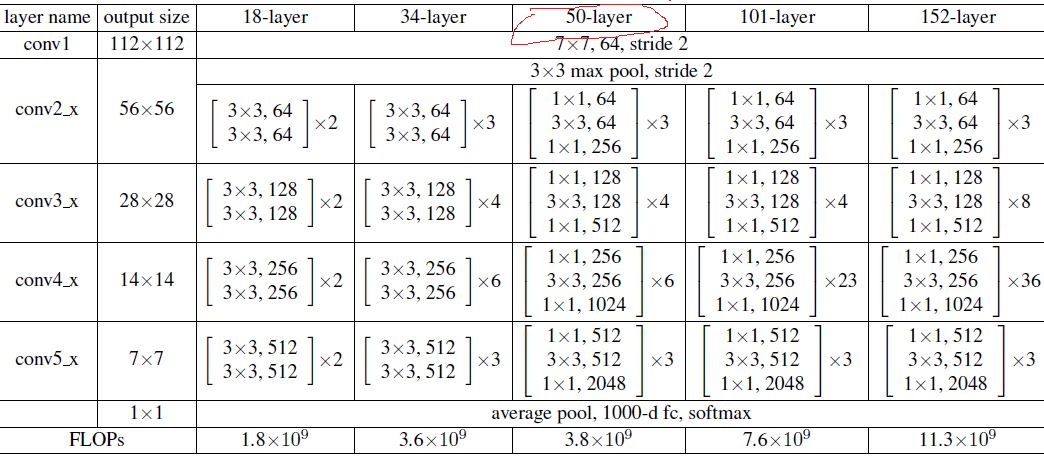

There are two main component of ResNet architecture. One is convlutional block and other is identity block.

## Convolutional Block


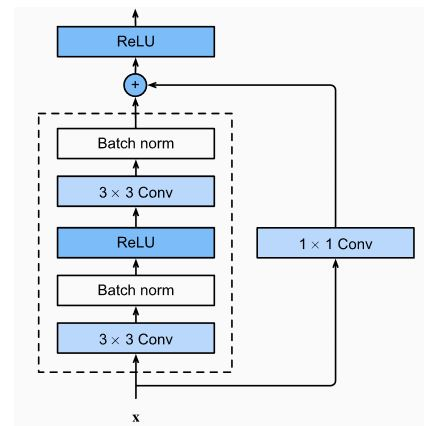

The main idea is to use skip connection which helps us degrading problem because as the network size increases, the network get saturated and the original representation was forget by the network.

In this block at the end of network we simply pass the orignal input by 1x1 convolution layer and add this to the output section, which will help to reduce degrading problem.

## Identity Block

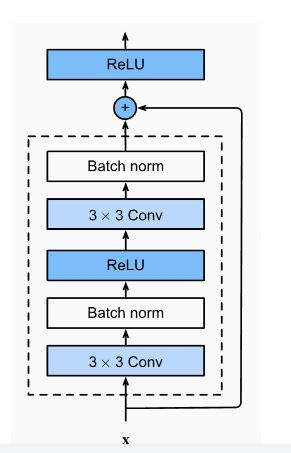

The difference between convolution block and identity block is just that in identity we don't pass the input feature to any other layer in skip connection part just simply add the input with the output

I suggest you to take out paper pen an go through every convolutional layer check the padding criteria and how the output is being calculated, it helps you understand the architecture in depth.

###Formula for output feature map:

Output = (Input_shape - Kernel_size +2P)/S  + 1

Input_shape: if we have image size 224,224,3 then we select 224 for this parameter.

kernel_size: (2,2) then we select 2

P : padding, same means the output feature map size is equal to input when padding= valid it means that our P=0

S: Strides 

# Code

In Resnet50 Convolutional block consist of 3 convolutional operations   as proposed in [Deep Residual Network](https://arxiv.org/abs/1512.03385) paper.

Kernel size throughout the architecture is same we are just changing the strides and number of filters in layers. See the image of architecture given above.

In [4]:
import tensorflow as tf

## Convolution Block

In [5]:
def convolution_block(inputs,filters,strides):


  conv_1 = tf.keras.layers.Conv2D(filters[0],kernel_size=(1,1),strides=strides,padding="valid")(inputs)
  conv_1 = tf.keras.layers.BatchNormalization()(conv_1)
  conv_1 = tf.keras.layers.Activation('relu')(conv_1)

  conv_2 = tf.keras.layers.Conv2D(filters[1],kernel_size=(3,3),strides=(1,1),padding="same")(conv_1)
  conv_2 = tf.keras.layers.BatchNormalization()(conv_2)
  conv_2 = tf.keras.layers.Activation('relu')(conv_2)

  conv_3 = tf.keras.layers.Conv2D(filters[2],kernel_size=(1,1),strides=(1,1),padding="valid")(conv_2)
  conv_3 = tf.keras.layers.BatchNormalization()(conv_3)
  conv_3 = tf.keras.layers.Activation('relu')(conv_3)

  # Skip connection
  conv_shortcut =  tf.keras.layers.Conv2D(filters[2],kernel_size=(1,1),strides=strides,padding="valid")(inputs)
  conv_shotcut = tf.keras.layers.BatchNormalization()(conv_shortcut)

  return tf.keras.layers.Add()([conv_3,conv_shortcut])


## Identity Block

In [8]:
def Identity_block(inputs,filters):
  conv_1 = tf.keras.layers.Conv2D(filters[0],kernel_size=(1,1),strides=(1,1),padding="valid")(inputs)
  conv_1 = tf.keras.layers.BatchNormalization()(conv_1)
  conv_1 = tf.keras.layers.Activation('relu')(conv_1)

  conv_2 = tf.keras.layers.Conv2D(filters[1],kernel_size=(3,3),strides=(1,1),padding="same")(conv_1)
  conv_2 = tf.keras.layers.BatchNormalization()(conv_2)
  conv_2 = tf.keras.layers.Activation('relu')(conv_2)

  conv_3 = tf.keras.layers.Conv2D(filters[2],kernel_size=(1,1),strides=(1,1),padding="valid")(conv_2)
  conv_3 = tf.keras.layers.BatchNormalization()(conv_3)
  conv_3 = tf.keras.layers.Activation('relu')(conv_3)

  # Skip connection

  conv_shortcut = inputs

  return tf.keras.layers.Add()([conv_3,conv_shortcut])




In [10]:
inputs  = tf.keras.layers.Input(shape=(224,224,3))

conv_1 = tf.keras.layers.Conv2D(64,kernel_size=(7,7),strides=2)(inputs)
conv_1 = tf.keras.layers.BatchNormalization()(conv_1)

pool = tf.keras.layers.MaxPool2D((3,3),strides=2)(conv_1)

# Conv2_x

x = convolution_block(pool,[64,64,256],strides=1)
x = Identity_block(x,[64,64,256])
x = Identity_block(x,[64,64,256])

#Conv3_x
x = convolution_block(x,[128,128,512],strides=2) # strides is 2 as mentioned in paper https://arxiv.org/abs/1512.03385
x = Identity_block(x,[128,128,512])
x = Identity_block(x,[128,128,512])
x = Identity_block(x,[128,128,512])

#Conv4_x
x = convolution_block(x,[256,256,1024],strides=2) # strides is 2 as mentioned in paper https://arxiv.org/abs/1512.03385
x = Identity_block(x,[256,256,1024])
x = Identity_block(x,[256,256,1024])
x = Identity_block(x,[256,256,1024])

#Conv5_x
x = convolution_block(x,[512,512,2048],strides=2) # strides is 2 as mentioned in paper https://arxiv.org/abs/1512.03385
x = Identity_block(x,[512,512,2048])
x = Identity_block(x,[512,512,2048])
x = Identity_block(x,[512,512,2048])

avg_pool = tf.keras.layers.GlobalAveragePooling2D()(x)
dense = tf.keras.layers.Dense(1000,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs,outputs=dense)

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_55 (Conv2D)             (None, 109, 109, 64  9472        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_55 (BatchN  (None, 109, 109, 64  256        ['conv2d_55[0][0]']              
 ormalization)                  )                                                           